In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy
import statsmodels.api as sm

matplotlib.rcParams['figure.figsize'] = (20, 10)

In [73]:
def linear_data_generator1(m, b, range, N, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size=N)
  ys = m*sample + b
  noise = rng.normal(loc=0., scale=3, size=N)
  return (sample, ys + noise)

def linear_data_generator2(m, b, range, N, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size=(N, m.shape[0]))
  ys = numpy.dot(sample, numpy.reshape(m, (-1,1))) + b
  noise = rng.normal(loc=0., scale=50, size=ys.shape)
  return (sample, ys+noise)

def nonlinear_data_generator1(m, b, range, N, seed):
  rng = numpy.random.default_rng(seed=seed)
  sample = rng.uniform(low=range[0], high=range[1], size = N)
  ys = numpy.exp(m*sample) + b
  noise = rng.normal(loc=0, scale=0.5, size=N)
  return (sample, ys+noise)


def linear_model(xs, ys):
  ones = numpy.reshape(numpy.ones_like(ys), (-1,1))
  if len(xs.shape) == 1:
    xs = numpy.reshape(xs, (-1,1))
  A = numpy.hstack((ones, xs))
  u, s, vT = numpy.linalg.svd(A)
  u = u[:,:A.shape[1]]
  s_inv = numpy.diag(numpy.power(s, -1))
  uT = numpy.transpose(u)
  v = numpy.transpose(vT)
  pinv = numpy.dot(v, numpy.dot(s_inv, uT))
  coefs = numpy.dot(pinv, ys)
  return coefs

# A Linear One-Dimensional Example

In [3]:
xs, ys = linear_data_generator1(3, -1, [-10, 10], 1000, 8675309)

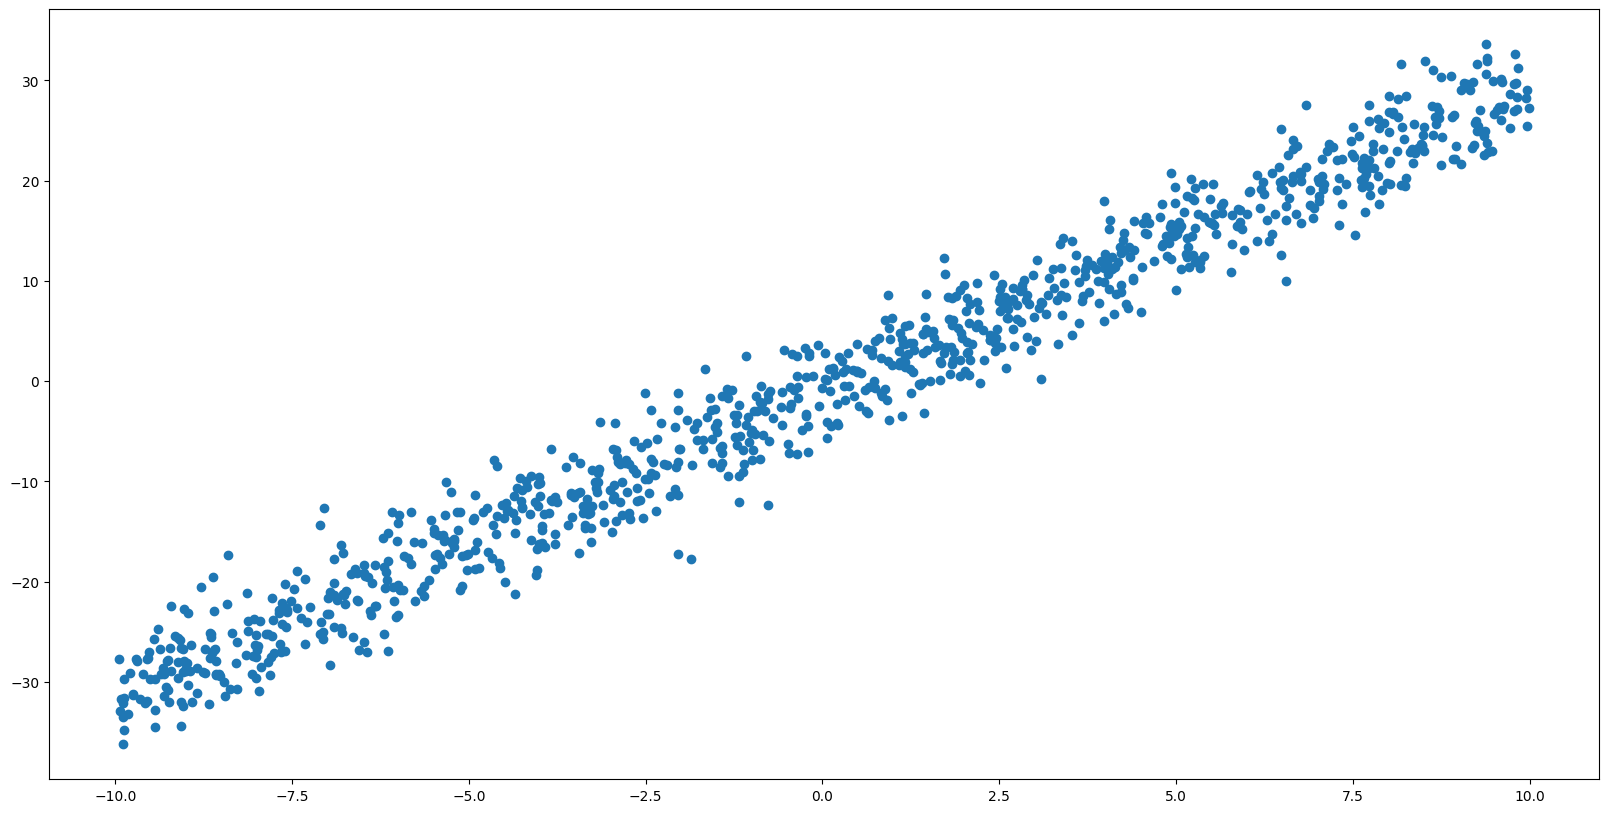

In [4]:
plt.scatter(x=xs, y=ys)

In [5]:
coefs = linear_model(xs, ys)
predictions = coefs[0] + xs*coefs[1]
errors = ys - predictions

In [6]:
coefs

array([-1.03445336,  3.02624198])

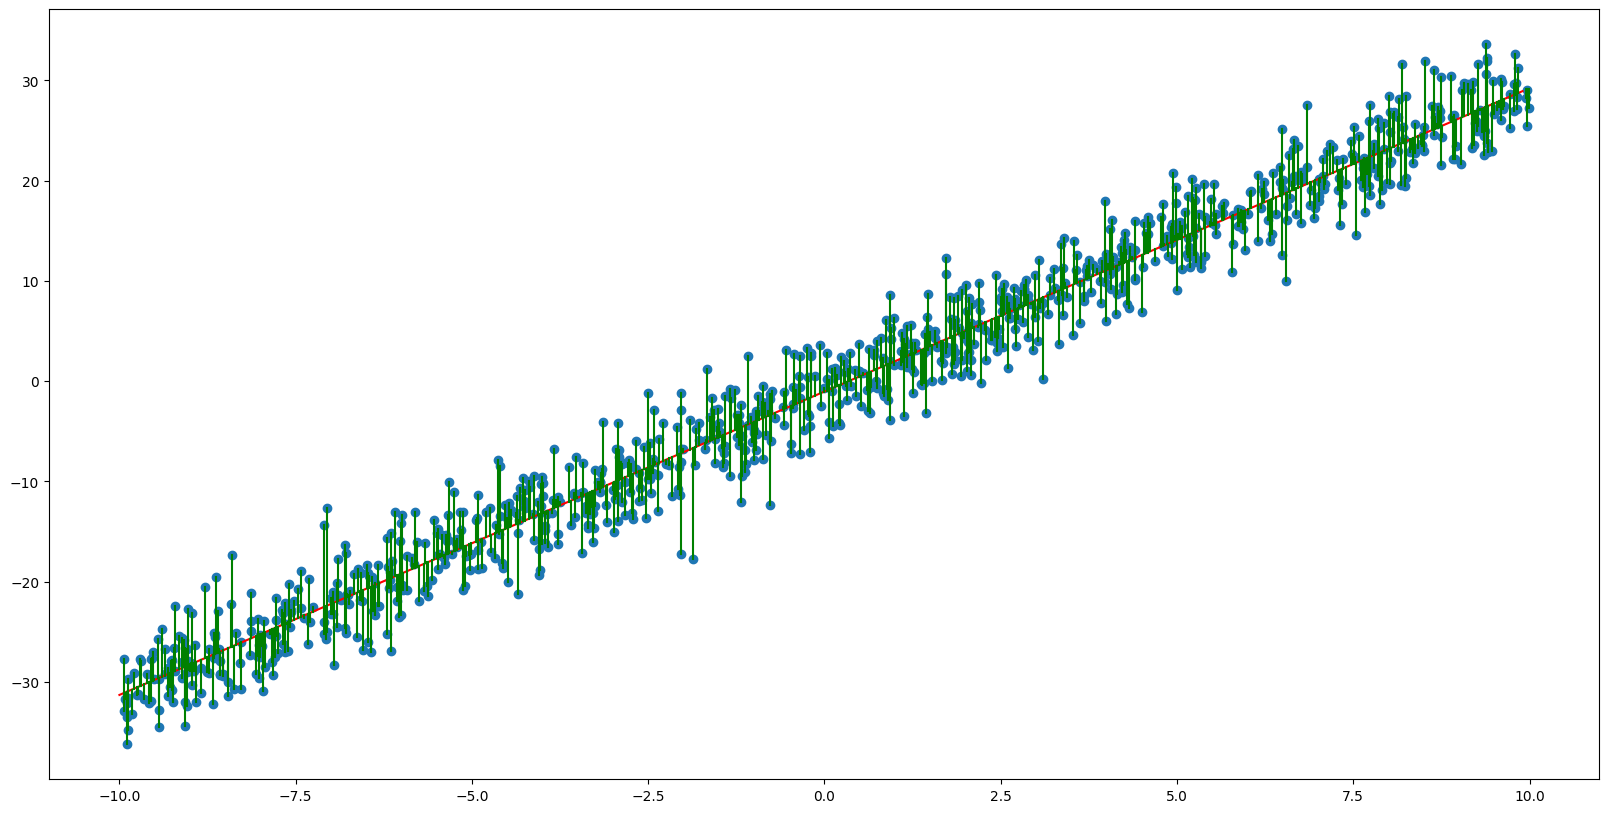

In [7]:
range = numpy.arange(-10, 10, 0.1)
plt.scatter(x=xs, y=ys)
plt.plot(range, coefs[0] + range*coefs[1], color='red')
for x, y, p in zip(xs, ys, predictions):
  plt.plot([x,x], [y, p], color='green')
plt.show()

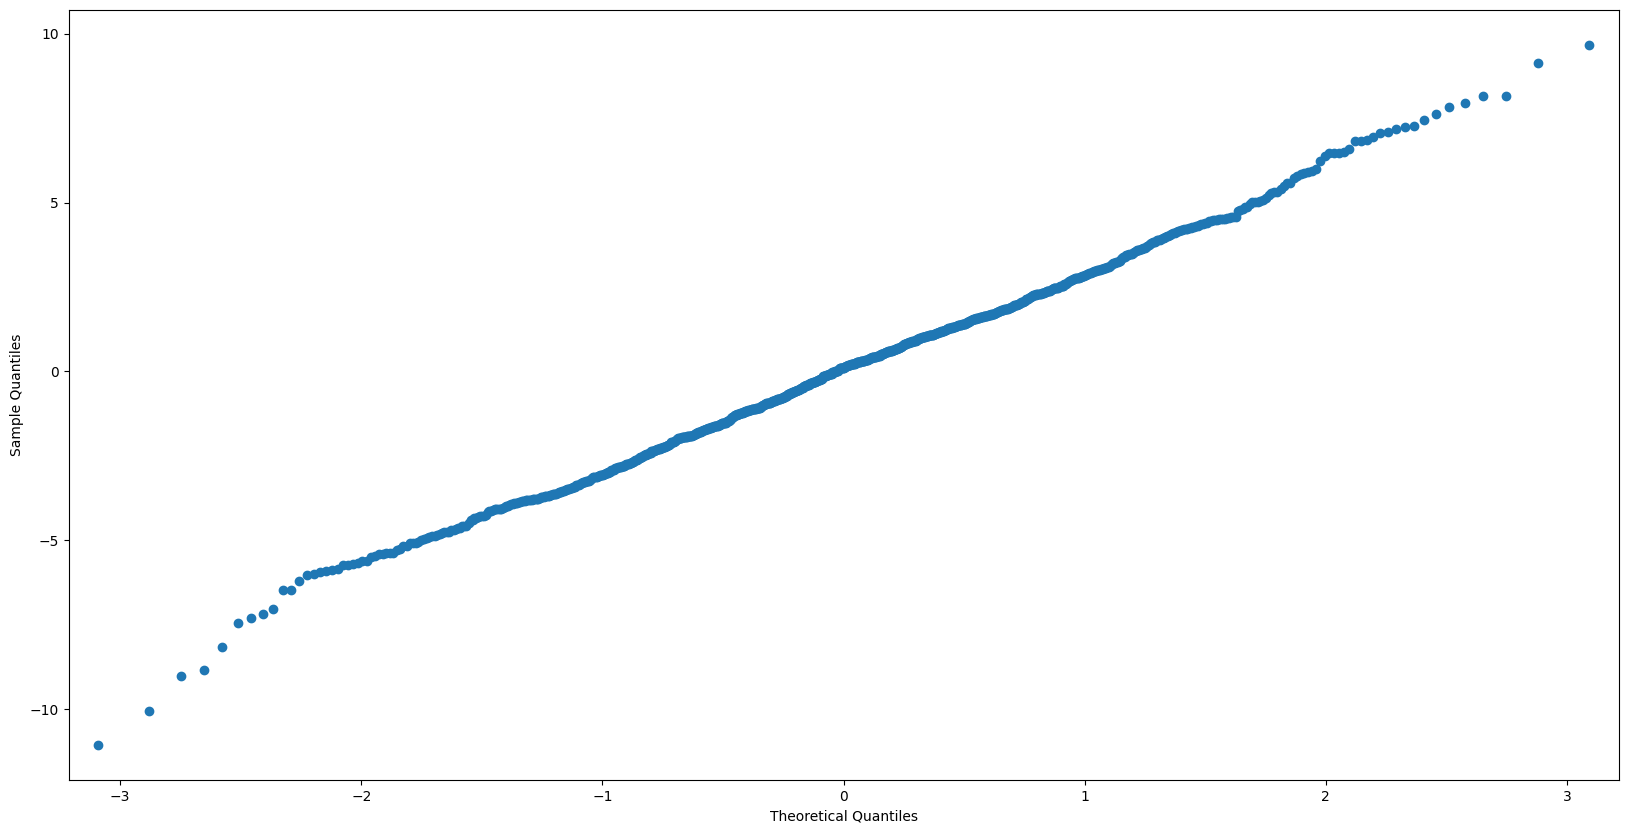

In [8]:
sm.qqplot(errors)
plt.show()

# Some Non-Linear Data

In [9]:
xs, ys = nonlinear_data_generator1(-0.8, 3, [-3,3], 1000, 8675309)

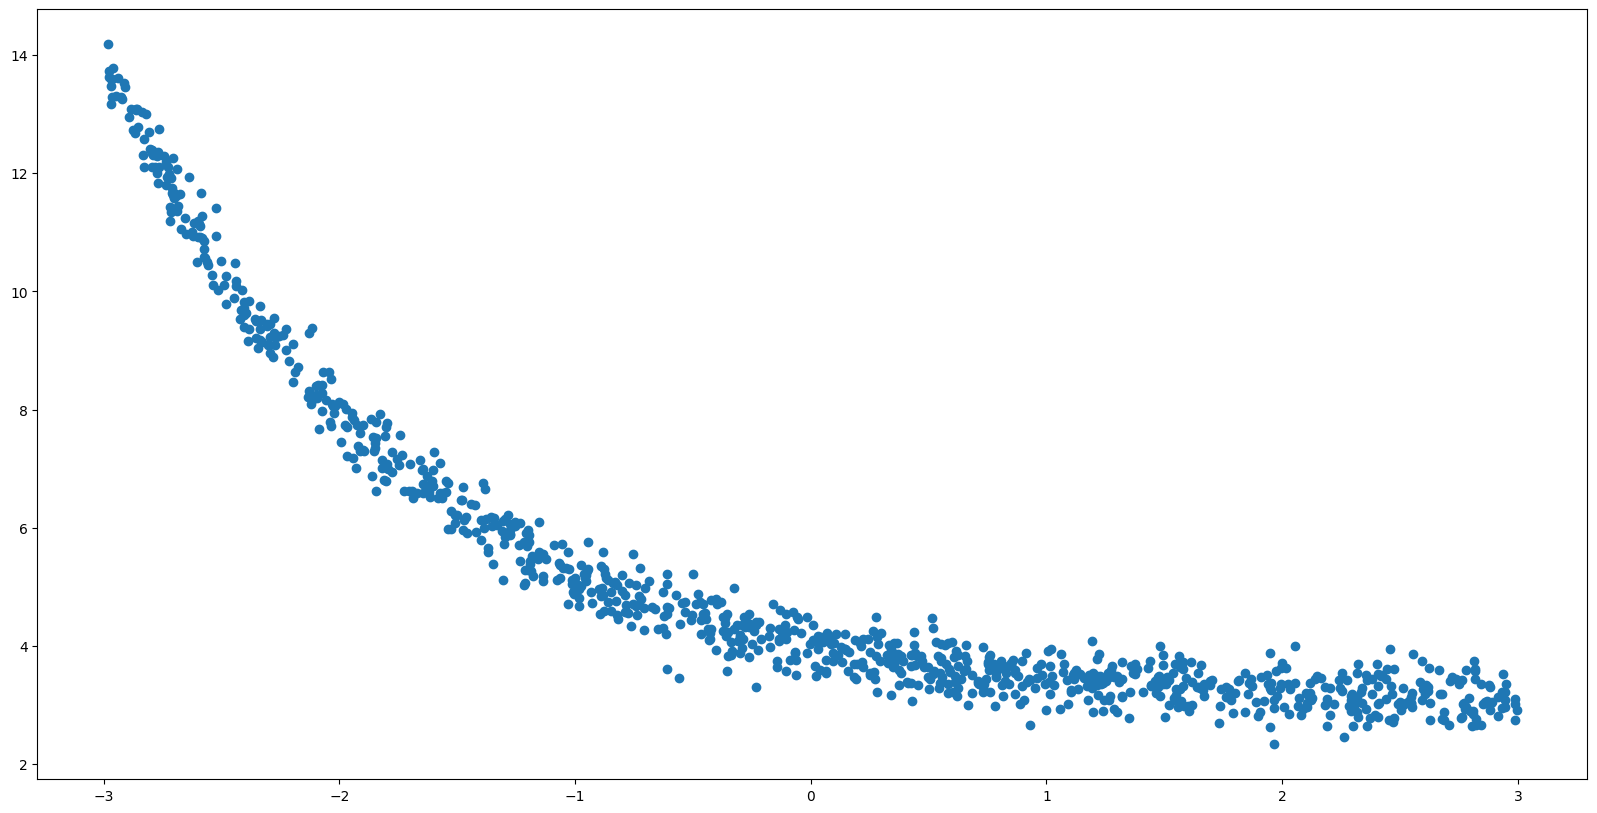

In [10]:
plt.scatter(xs, ys)

In [11]:
coefs = linear_model(xs, ys)

In [12]:

coefs = linear_model(xs, ys)
predictions = coefs[0] + xs*coefs[1]
errors = ys - predictions

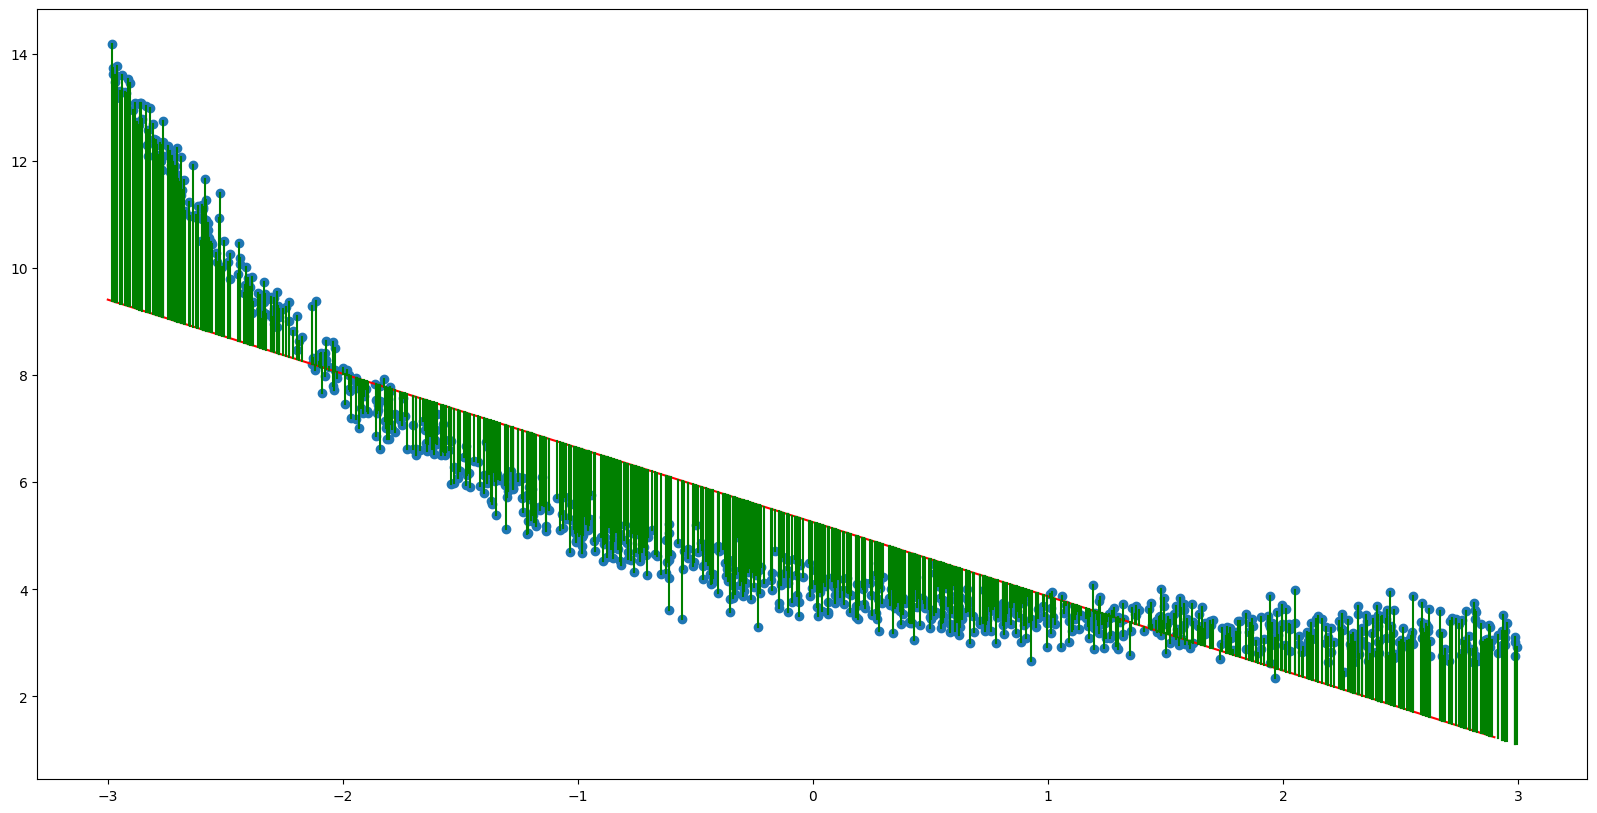

In [13]:
range = numpy.arange(-3, 3, 0.1)
plt.scatter(x=xs, y=ys)
plt.plot(range, coefs[0] + range*coefs[1], color='red')
for x, y, p in zip(xs, ys, predictions):
  plt.plot([x,x], [y, p], color='green')
plt.show()

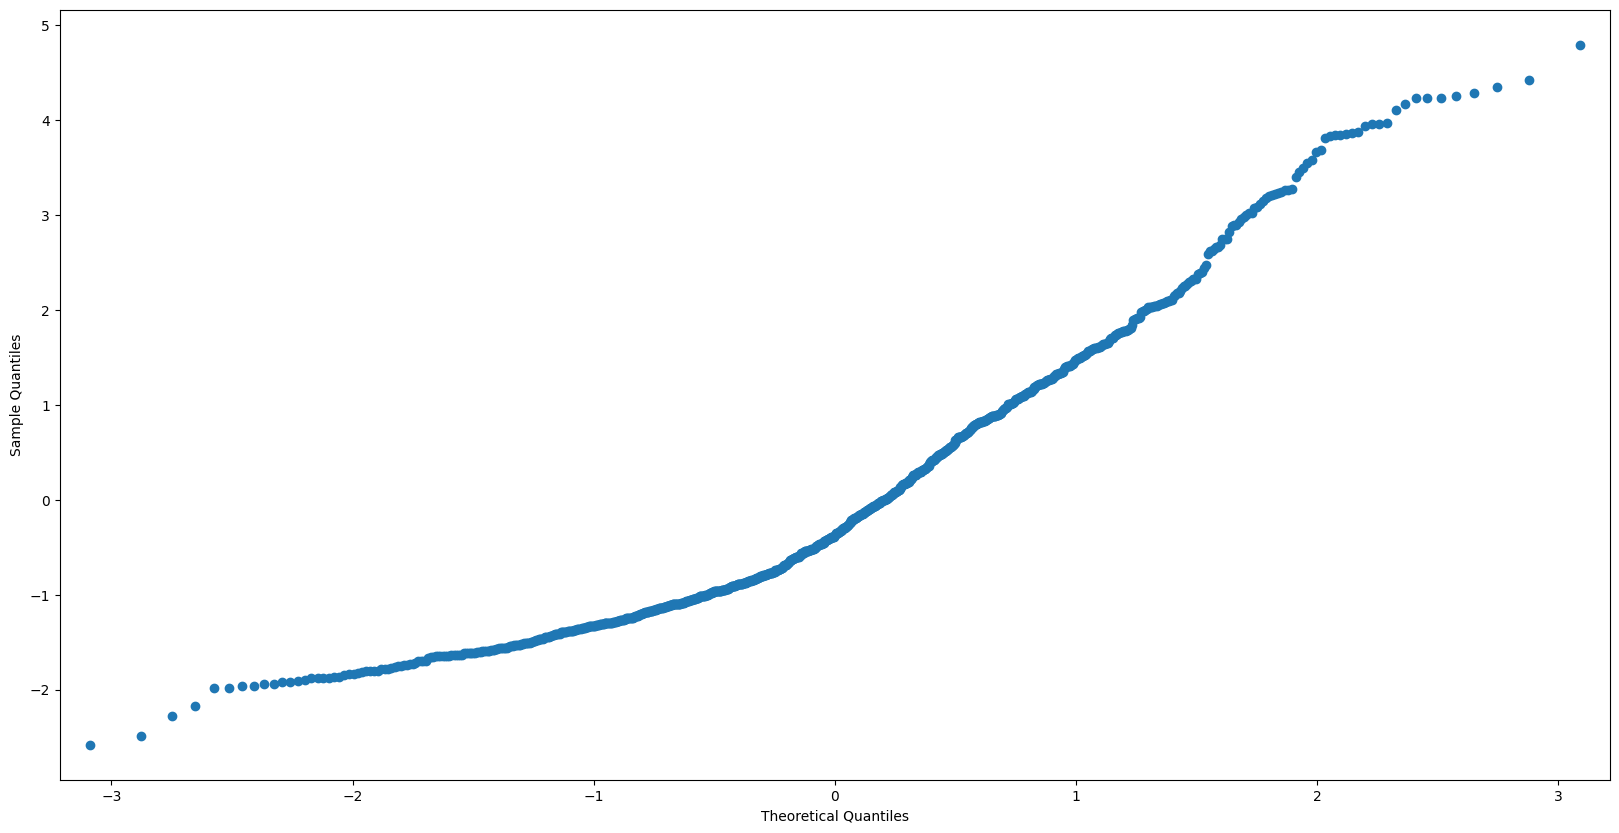

In [14]:
sm.qqplot(errors)
plt.show()

# Up In Dimension

In [15]:
rng = numpy.random.default_rng(seed=8675309)
m = rng.integers(low=-5, high=10, size=500)
xs, ys = linear_data_generator2(m, 2.2, [-10, 10], 10000, seed=8675309)

In [16]:
xs.shape

(10000, 500)

In [17]:
coefs = linear_model(xs, ys)

In [19]:
coefs.shape

(501, 1)

In [20]:
preds = coefs[0][0] + numpy.dot(xs, numpy.reshape(coefs[1:], (-1,1)))
errors = ys - preds

In [21]:
errors = numpy.reshape(errors, (-1,))

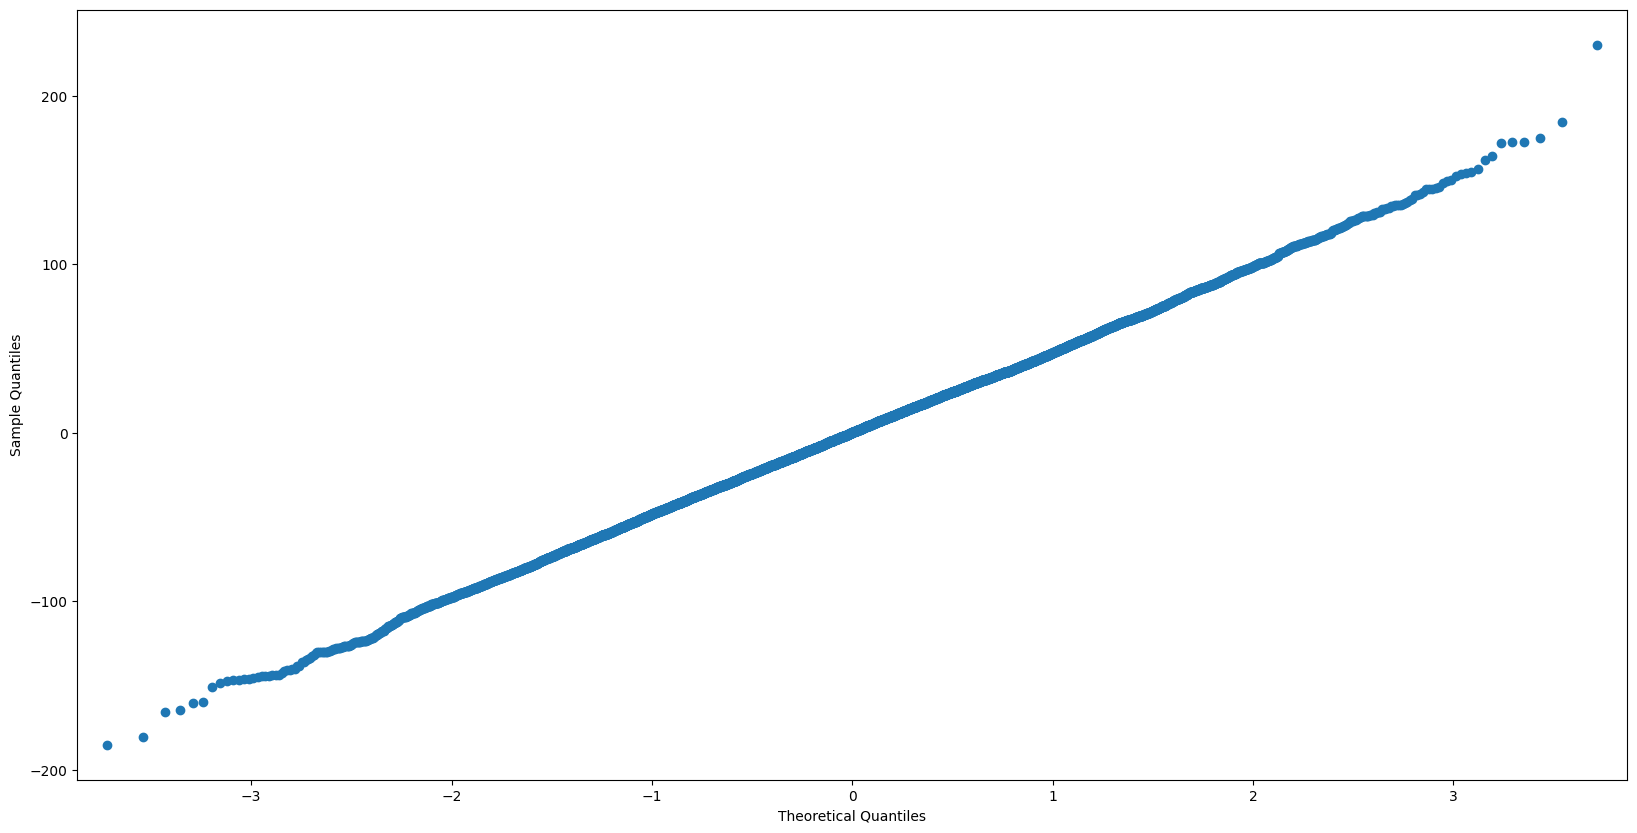

In [22]:
sm.qqplot(errors)
plt.show()

# Back To Non-Linearity

In [120]:
xs, ys = nonlinear_data_generator1(-0.3, 4.1, [-8, 8], 10, 8675309)

In [121]:
xs = numpy.reshape(xs, (-1,1))
higher_orders = numpy.hstack([numpy.power(xs, n) for n in numpy.arange(1, 10,1)])

In [122]:
higher_orders.shape

(10, 9)

In [123]:
coefs = linear_model(higher_orders, ys)

In [124]:
coefs

array([ 5.18510209e+00,  2.34816531e+00,  9.70742888e-01, -1.33153113e+00,
       -2.98348774e-01,  1.89035462e-01,  2.68704511e-02, -1.00335383e-02,
       -5.97621448e-04,  1.66185082e-04])

In [125]:
preds = coefs[0] + numpy.dot(higher_orders, numpy.reshape(coefs[1:], (-1,1)))
errors = ys - numpy.reshape(preds, (-1,))

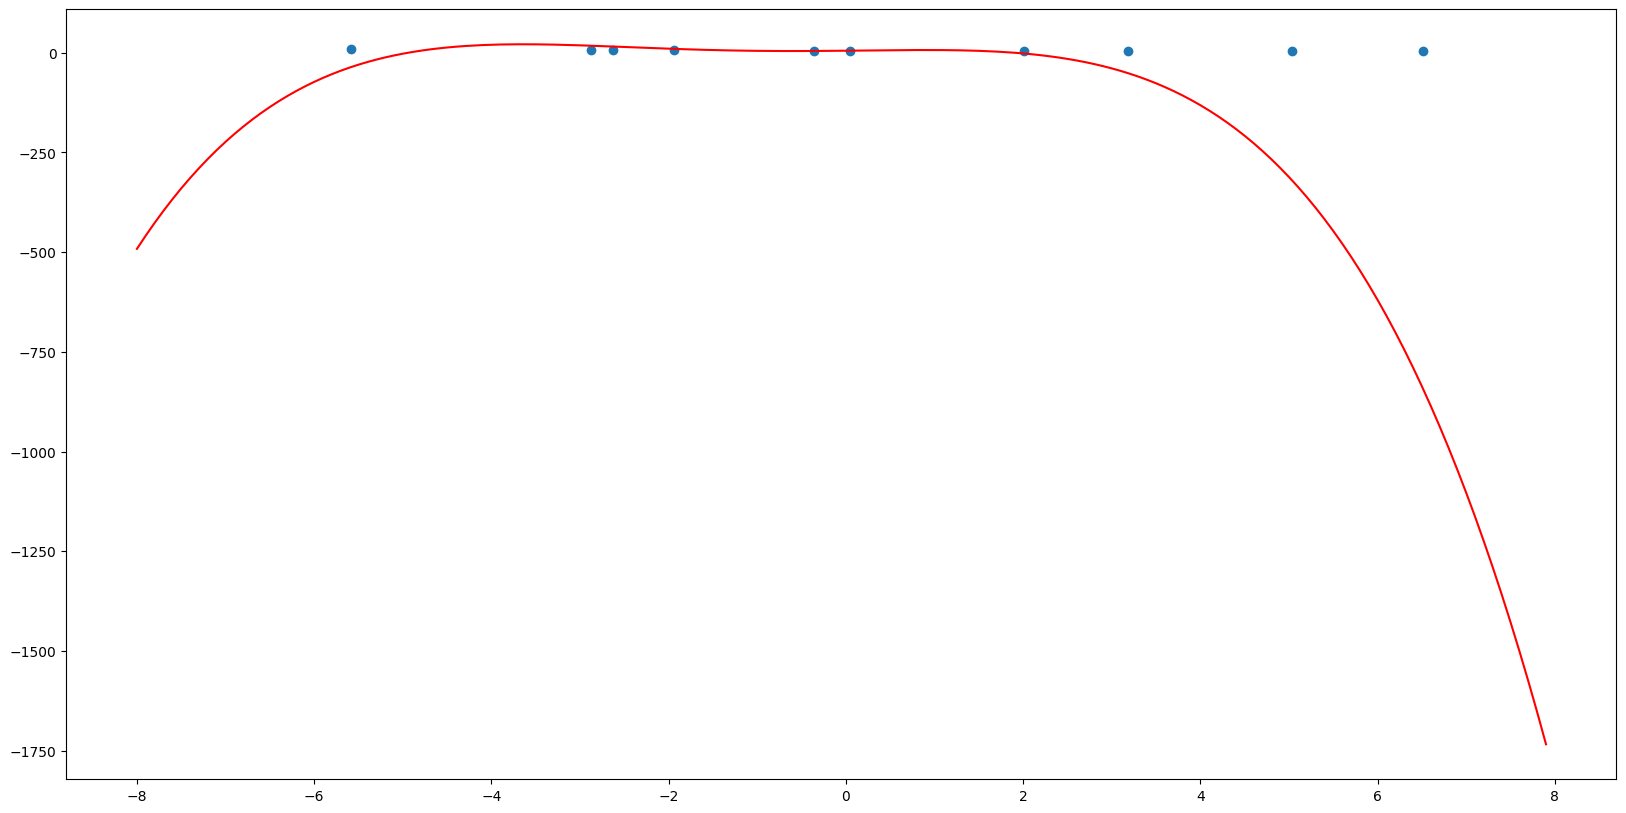

In [126]:
range = numpy.arange(-8, 8, 0.1)
plt.scatter(x=xs, y=ys)
plt.plot(range, coefs[0] + range*coefs[1] + numpy.power(range, 2)*coefs[2] + numpy.power(range, 3)*coefs[3] + numpy.power(range, 4)*coefs[4], color='red')
plt.show()

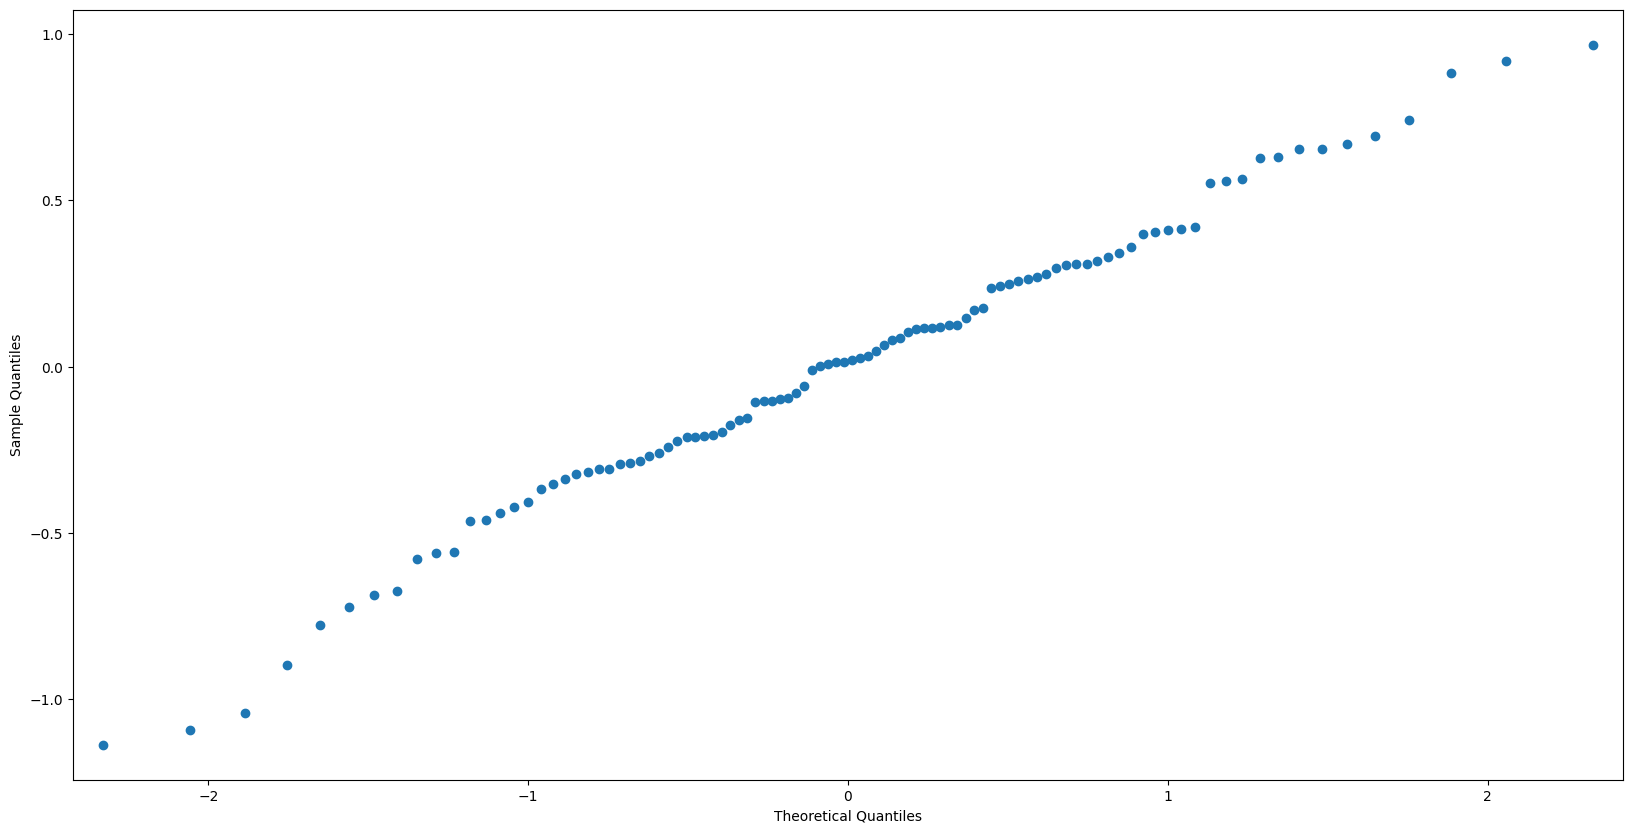

In [90]:
sm.qqplot(errors)
plt.show()